In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
X, y = make_classification(
    n_samples=50,
    n_classes=2,
    n_redundant=0,
    n_features=2,
    random_state=0
)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0])

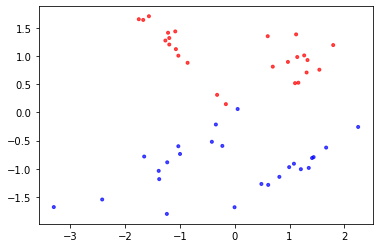

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.',
            cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)
plt.show()

## Learn, predict

In [23]:
# set data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    random_state=42
)

# classify for learning and evaluation
train_X, test_x, train_y, test_y = train_test_split(X, y, random_state=42)

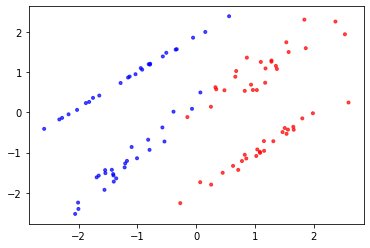

In [24]:
plt.scatter(X[:, 0], X[:, 1], marker='.',
           c=y, cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

In [25]:
from sklearn.linear_model import LogisticRegression
# build model
model = LogisticRegression(random_state=42)

## Logistic Regression
線形分離可能なデータの境界線を学習することによって見つけてデータの分類を行う手法

### クラス分類（2クラス分類）
&emsp;確率分布: $ P(C_1|\boldsymbol{x}) + P(C_2|\boldsymbol{x}) = 1 $を満たす。ここにロジスティックシグモイド関数を導入すると、
##### &emsp;&emsp;- ロジスティックシグモイド関数
$$
    σ(u) = \frac{1}{1 + e^{-u}} = \frac{e^{u}}{1 + e^{u}} \\
$$
&emsp;クラス分類での条件付き分布は
$$
    P(C_1|x) = σ(u) \qquad (0 \leq σ(u) \leq 1)\\
    u = \log \frac{P(C_1|\boldsymbol{x}))}{1 - P(C_1|\boldsymbol{x})} = \log \frac{P(C_1|\boldsymbol{x})}{P(C_2|\boldsymbol{x})}\\
$$
&emsp;この時、u は対数オッズと呼ばれる因子。<br>
$ e^{u} = P(C_1|\boldsymbol{x}) / P(C_2|\boldsymbol{x}) $:オッズ比で、$C_1$である確率とそうでない確率の比率を表す。<br>
&emsp;多くのクラス分類では、対数オッズ$ u $が入力に関する線形関数であることを仮定した単純な確率モデルが用いられる。
$$
    u = \boldsymbol{w}^{\mathrm{T}}\boldsymbol{x} + b
$$

In [26]:
# learning
model.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [27]:
predict = model.predict(test_x)

In [28]:
model.score(test_x, test_y)

0.96

In [29]:
print("accuracy: ", accuracy_score(test_y, predict))
print("precision: {:.2f}".format(precision_score(test_y, predict)))
print("recall: ", recall_score(test_y, predict))

accuracy:  0.96
precision: 0.92
recall:  1.0


In [30]:
# 学習させて導出した識別境界線をプロット
# mode.coef_: データの各要素の重み（傾き）
# model.intercept_: データの要素全体に対する補正（切片）
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
    Xi - model.intercept_ / model.coef_[0][1]

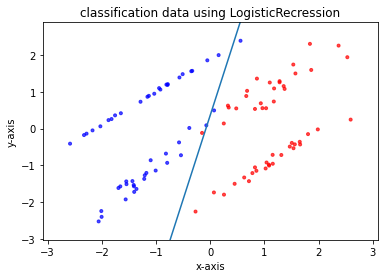

In [31]:
plt.scatter(X[:, 0], X[:, 1], marker='.',
           c=y, cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)
plt.plot(Xi, Y)
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.title("classification data using LogisticRecression")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

### 線形SVM (support Verctor Machine)
&emsp;データの境界線を見つけることでデータの分類を行う手法

サポートベクター：クラスごとの境界線に最も近い境界線の距離を表すベクトル

このサポートベクターの距離の合計を最大化することによって境界線を決定する手法

In [55]:
from sklearn.svm import LinearSVC

In [56]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    random_state=42
)

train_X, test_X, train_y, train_Y = train_test_split(X, y, random_state=42)

In [57]:
model = LinearSVC()

In [58]:
model.fit(train_X, train_y)

LinearSVC()

In [59]:
print(model.score(test_X, test_y))

1.0


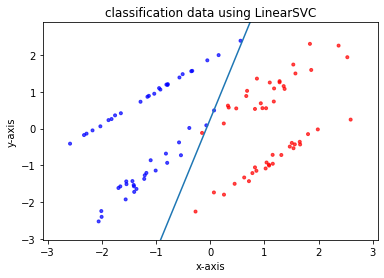

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.',
           cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
    Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.title("classification data using LinearSVC")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [61]:
model.score(test_X, test_y)

1.0

### 非線形SVM
カーネル関数によってデータを操作することで、入力データが線形分離可能な状態になる

In [63]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

In [64]:
# 線形分離不可能なデータの生成

data, label = make_gaussian_quantiles(
    n_samples=1000,
    n_classes=2,
    n_features=2,
    random_state=42
)

In [65]:
data

array([[ 1.64496771, -0.24903604],
       [ 1.18947049, -1.22760782],
       [ 0.06980208, -0.3853136 ],
       ...,
       [ 0.59740007,  0.70117274],
       [ 2.64434335, -1.50297033],
       [ 0.84062003,  0.54673357]])